### Bayesian Models (introductory)

**John Maynard Keynes said "When the facts change, I change my mind. What do you do, sir?"**

Bayesian inference differs from more traditional statistical inference by preserving uncertainty

The fundamentally different ways of thinking about stats are Frequentists versus Bayesian. **Frequentist**, known as the more classical version of statistics, assume that probability is the long-run frequency of events. F.i., the probability of plane accidents under a frequentist philosophy is interpreted as the long-term frequency of plane accidents. This makes logical sense for many probabilities of events, but becomes more difficult to understand when events have no long-term frequency of occurrences. Consider: we often assign probabilities to outcomes of presidential elections, but the election itself only happens once! Frequentists get around this by invoking alternative realities and saying across all these realities, the frequency of occurrences defines the probability.

**Bayesians** have a more intuitive approach. Bayesians interpret a probability as measure of belief, or confidence, of an event occurring. Simply, a probability is a summary of an opinion. An individual who assigns a belief of 0 to an event has no confidence that the event will occur; conversely, assigning a belief of 1 implies that the individual is absolutely certain of an event occurring. Beliefs between 0 and 1 allow for weightings of other outcomes. This definition agrees with the probability of a plane accident example, for having observed the frequency of plane accidents, an individual's belief should be equal to that frequency, excluding any outside information. Similarly, under this definition of probability being equal to beliefs, it is meaningful to speak about probabilities (beliefs) of presidential election outcomes: how confident are you candidate A will win? (source: https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Ch1_Introduction_PyMC3.ipynb)


In Bayesian statistics, we denote $N$ as the number of instances of evidence we possess. As we gather an infinite amount of evidence, say as $N \rightarrow \infty$, our Bayesian results (often) align with frequentist results. Hence for large $N$, statistical inference is more or less objective. On the other hand, for small $N$, inference is much more unstable: frequentist estimates have more variance and larger confidence intervals. This is where Bayesian analysis excels. By introducing a prior, and returning probabilities (instead of a scalar estimate), we preserve the uncertainty that reflects the instability of statistical inference of a small $N$ dataset.

** BAYES AGAIN!

- So we denote our belief about event $Y$ as $P(Y)$ and call this quantity the **prior probability**
- We denote our updated belief as $P(Y |X )$, interpreted as the probability of $Y$ given the evidence $X$. We call the updated belief the **posterior probability** so as to contrast it with the prior probability.

Updating our belief is done via Bayes' Theorem, after its discoverer Thomas Bayes:
- $P(Y \rvert X) = \frac{P(X \rvert Y) P(Y)}{P(X)}$

**Bayesian learning for model parameters**

- Step 1) Given N data, $ D = X_{1:n} = X_{1}, X_{1}, ..., X_{n} = \left\{ X_{1}, X_{2}, ... X_{n} \right\} $ write down the expression for the likelihood $P(D\rvert\theta)$ where likelihood is the probability of the model parameters, given the data. i.e. **how we think our data is distributed**
- step 2) Specify a prior $P(\theta)$ (**what we think about $\theta$ before we have seen any data**). This indicates: 
    - A) the **uncertainty of he parameters**, thereby indicating that our beliefs in the parameters are subjective. There is no such thing as a $\theta_{0}$ in case of $\inf$ and $\theta$ is a random variable. For maximum likelihood $\theta$ is NOT a random variable but the randomness is in the data. In Bayesian Inference, we are putting a distribution to the $\theta$, thereby acknowledging there is uncertainty.
    
    -B) the prior distribution can also indicate a minimal belief. We choose the priro that encodes my beliefs about the problem. By new observations are then updates beliefs about the problem. 
    
    C) By every new observation we update our belief and that will give the **posterior distribution**
    $P(\theta \rvert D) = \frac {P(D \rvert \theta) \hspace{2mm} P(\theta)} {p(D)} \propto \hspace{1mm} P(D \rvert \theta)P(\theta)$ calculated by multiplying the likelihood x the parameters.

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
import scipy.stats as stats
import sys
sys.path.insert(0, 'helper_functions/')
from utilities import remove_borders
import bayesian_helpers as bh

figsize=[12,6]
PATH = 'data/'
PATH_IMAGE = 'images/'

In the `helper_functions` there is a `bayesian_helpers.py` scripts to start playing with some coin-toss examples. 

- First function is a `running_proportion_sim` function that simulates coin tosses and visualizes a proportion of heads. As N trials grows in size we see the proportion of heads is close to 50%, which we expect with a fair coin.

- second function is `running_posterior_probabilities_sim` where we see the posterior probabilities that are represented by the curves, and our uncertainty is proportional to the width of the curve.

An interesting question to ask is how our inference changes as we observe more and more data? More specifically, what do our posterior probabilities look like when we have little data, versus when we have lots of data. A plot that visualizes this. (inspired by  same notebook mentioned in the beginning)

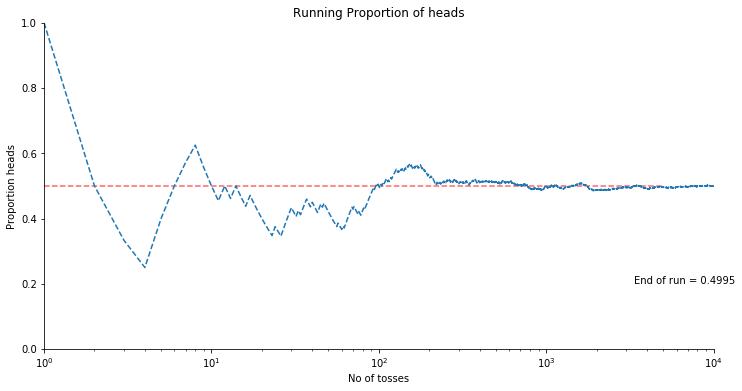

In [258]:
# function running_proportion_sim
bh.running_proportion_sim(N=10000, random_seed=False)

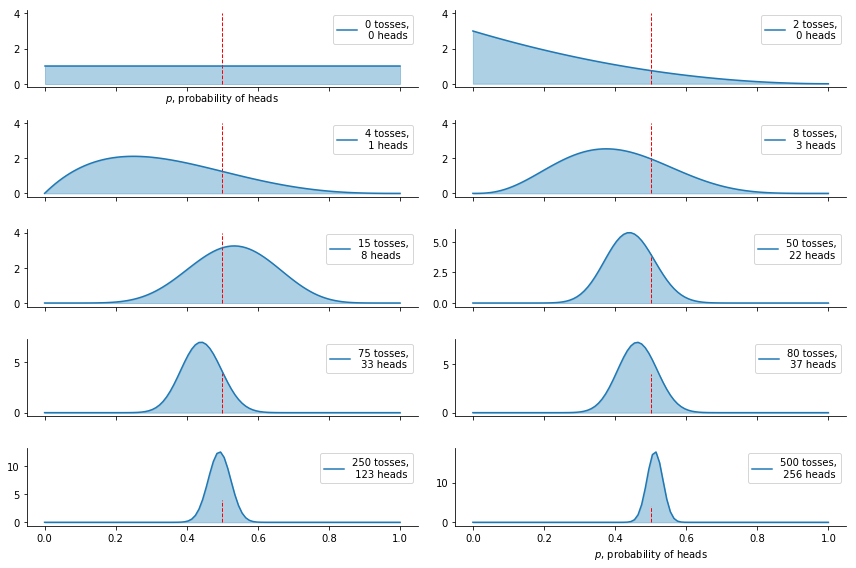

In [270]:
# make sure the n_trials list has an even number of elements 
_ = bh.running_posterior_probabilities_sim(n_trials=[0, 2, 4, 8, 15, 50, 75,80,250,500])

Recall:
**1) Discrete random variables** may only assume values on a specified list. Things like populations, and number of votes are all discrete random variables. Very appropriate for **count data**. 
When $Z$ is discrete, then its distribution is called a **probability mass function**, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$

```
poi = stats.poisson
poi.pmf
```

We say $Z$ is Poisson-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the intensity of the Poisson distribution.

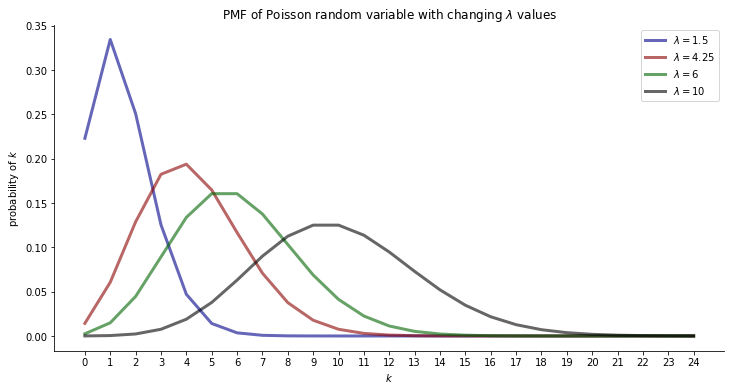

In [311]:
a = np.arange(25)
poi = stats.poisson
lambda_ = [1.5, 4.25, 6, 10]
colours = ['darkblue', 'darkred', 'darkgreen', 'black']
fig, ax  = plt.subplots(figsize=[12,6])
for i, l in enumerate(lambda_):
    ax.plot(a, poi.pmf(a, lambda_[i]), color=colours[i],
        label='$\lambda = {}$'.format(lambda_[i]), alpha=0.60, lw='3')
    ax.set(xticks = a, ylabel = "probability of $k$", xlabel = "$k$", 
      title = "PMF of Poisson random variable with changing $\lambda$ values")
    ax.legend()
    remove_borders(ax)

Recall:
**2) continuous random variables** have a **probability density function**. Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time. 

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

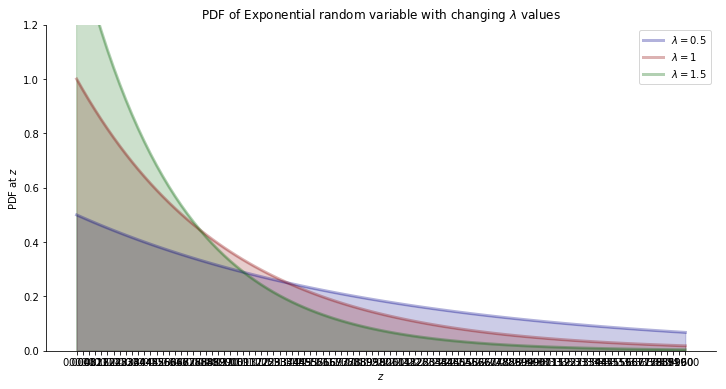

In [328]:
a = np.linspace(0, 4, 100)
poi = stats.expon
lambda_ = [0.5, 1, 1.5]

fig, ax  = plt.subplots(figsize=figsize)
for i, l in enumerate(lambda_):
    ax.plot(a, poi.pdf(a, scale=1./l), color=colours[i],
        label='$\lambda = {}$'.format(lambda_[i]), alpha=0.30, lw='3')
    ax.fill_between(a, poi.pdf(a, scale=1./l), color=colours[i], alpha=.20)
    ax.set(xticks = a, ylabel = 'PDF at $z$', xlabel = '$z$', ylim = (0,1.2),
      title = "PDF of Exponential random variable with changing $\lambda$ values")
    ax.legend()
    remove_borders(ax)

### Case 1: whatsapp messages

We have a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's whatsapp-messaging habits have changed over time, either gradually or suddenly.

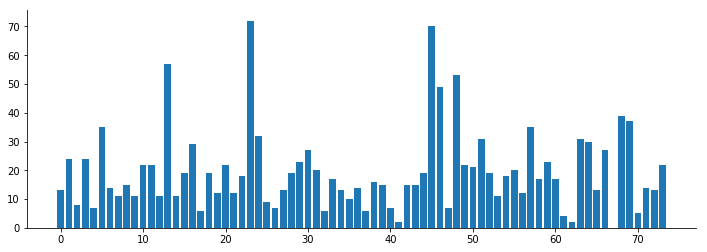

In [347]:
count_data = np.loadtxt(PATH + 'whatsapp_messages.csv')
n_count_data = len(count_data)
fig, ax  = plt.subplots(figsize=[12,4])
ax.bar(np.arange(len(count_data)), count_data)
remove_borders(ax)

How to model this? 

- "what is the best random variable to describe this count data?" We deal with count data so *Poisson random variable* is appropriate. Denoting day $i$'s whatsapp-message count by $C_i$ : $$ C_i \sim \text{Poisson}(\lambda)  $$
- Poisson dsitributions have a $\lambda$ parameter that is unknown. But to use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. What would be good prior probability distributions for $\lambda_1$ and $\lambda_2$? Needs to be positive number, so:

- What is a good distribution for the two $\lambda$s? The exponential is good, as it assigns probabilities to positive real numbers. Well the exponential distribution has a parameter too, call it $\alpha$. In other words: **exponential distribution** provides a continuous density function for positive numbers, so it might be a good choice for modeling $\lambda_i$. 
- Exponential distributions take their own hyper-parameter **$\alpha$**.
$$\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}$$

- How to set $\alpha$ then? At this point, we could continue and assign a distribution to $\alpha$, but it's better to stop once we reach a set level of ignorance: whereas we have a prior belief about $\lambda$, ("it probably changes over time", "it's likely between 10 and 30", etc.), we don't really have any strong beliefs about $\alpha$. So it's best to stop here. We think that the $\lambda$s are between 10-30, so if we set $\alpha$ really low (corresponding to larger probabilities on high values) we are not reflecting our prior well. Similar, a too-high alpha misses our prior belief as well. A good idea for $\alpha$ as to reflect our belief is to set the value so that the mean of $\lambda$, given $\alpha$, is equal to our observed mean.

- So, we have a suspicion that there are two $\lambda$ values, one for the earlier behaviour and one for the later behaviour. We don't know when the behaviour switches though, but call the switchpoint $\tau$ What about $\tau$? (tau) or the moment the user's whatsapp-messaging habits began to change (if ever). Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a uniform prior belief to every possible day. (We have no expert opinion of when $\tau$ might have occurred. So we will suppose $\tau$ is from a discrete uniform distribution over the entire timespan). This is equivalent to saying:

$$\begin{align}
&\tau \sim \text{DiscreteUniform(1,70) }\\
&\Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}$$

- It doesn't matter how are overall prior distributions for the unknown variables look like!

- use **PYMC3** to represent the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables.

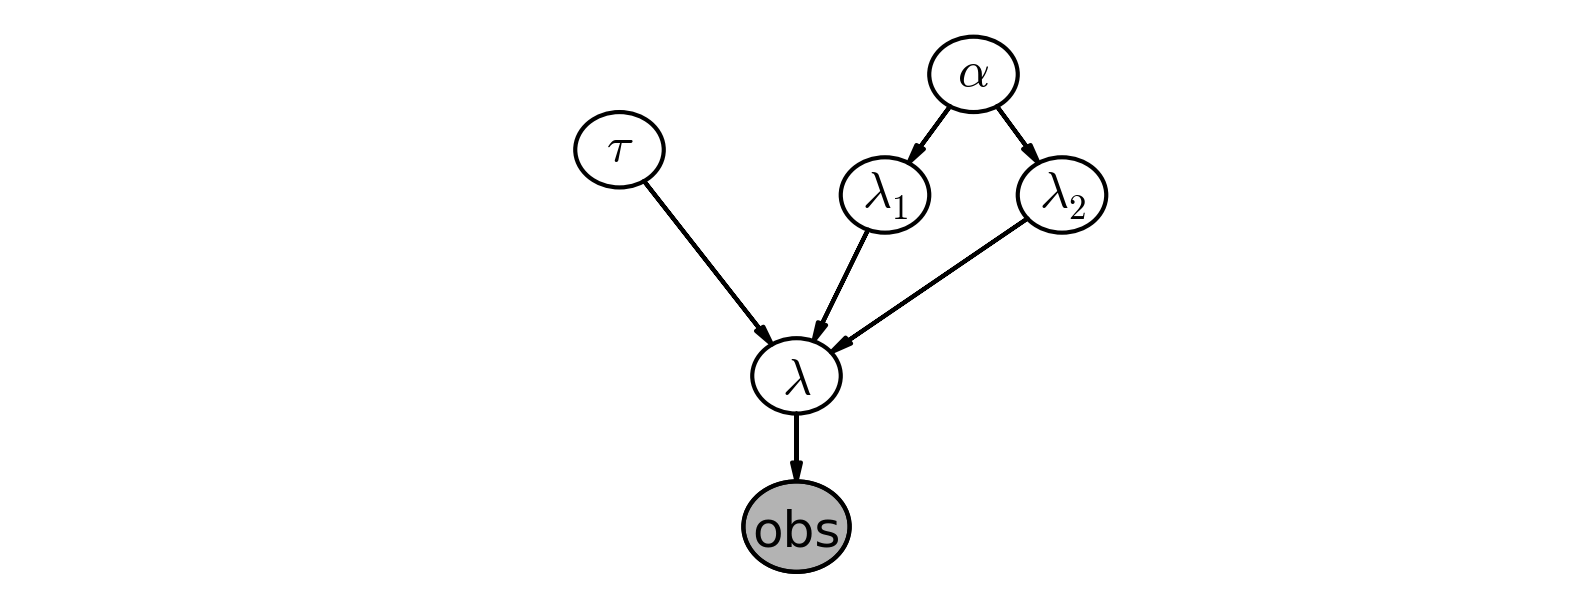

In [410]:
from IPython.display import Image
Image(PATH_IMAGE + 'whatsapp_message_parameters.png')

In [348]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # count_data =  whatsapp counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

Let's create a new function **lambda_**, to be thought of as a random variable. The switch() function assigns lambda_1 or lambda_2 as the value of `lambda_`, depending on what side of tau we are on. The values of lambda_ up until tau are lambda_1 and the values afterwards are lambda_2.

Note that because lambda1, lambda2 and tau are random, lambda_ will be random. We are not fixing any variables yet.

In [342]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2) 

In [343]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [371]:
type(observation)

pymc3.model.ObservedRV

In [344]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step) # traces are samples 

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
Sampling 2 chains: 100%|██████████| 30000/30000 [00:10<00:00, 2740.84draws/s]
/home/diederik/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


In [345]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

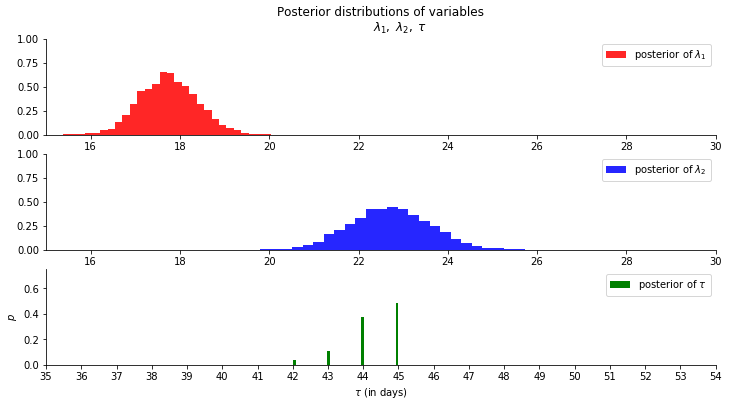

In [369]:
fig, ax = plt.subplots(3,1, figsize=figsize)

ax[0].hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
           label="posterior of $\lambda_1$", color='red', density=True)
ax[0].legend(loc="best")
ax[0].set(title = r"""Posterior distributions of variables
          $\lambda_1,\;\lambda_2,\;\tau$""", xlim = [15, 30], ylim=[0,1],
          xlabel = "$\lambda_1$ value")

ax[1].hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
          label="posterior of $\lambda_2$", color='blue', density=True)
ax[1].legend(loc="best")
ax[1].set(xlim = [15, 30], ylim=[0,1], xlabel = "$\lambda_2$ value")

w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
ax[2].hist(tau_samples, bins=n_count_data, alpha=1,
           label=r'posterior of $\tau$',color='green', weights=w, rwidth=2.)
_ = ax[2].set(xticks = (np.arange(n_count_data)))
ax[2].legend(loc='best')
ax[2].set(ylim = [0, .75], xlim = [35, len(count_data)-20], 
          xlabel = r'$\tau$ (in days)', ylabel = '$p$');
for i, x in enumerate(ax.flatten()):
    remove_borders(ax[i])

**Interpretation**

Bayesian methodologies return distributions. Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. Immediately, we can see the **uncertainty** in our estimates: the wider the distribution, the less certain our posterior belief should be. We can also see what the plausible values for the parameters are: $\lambda_1$ is around 18 and $\lambda_2$ is around 23. The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's whatsapp-message behaviour.

What other observations can we make? Notice also that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. In fact, the posterior distributions are not really of any form that we recognize from the original model. But that's OK! This is one of the benefits of taking a computational point of view. If we had instead done this analysis using mathematical approaches, we would have been stuck with an analytically intractable (and messy) distribution. Our use of a computational approach makes us indifferent to mathematical tractability.

Our analysis also returned a distribution for $\tau$. Its posterior distribution is very different because it is a discrete random variable (no assigning of probabilities to intervals) We can see that near day 45, there was a 50% chance that the user's behaviour changed. Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. By contrast, in the actual results we see that only three or four days make any sense as potential transition points.

Useful property of the Poisson distribution is that its expected value is equal to its parameter, so if we need to answer "what is the expected number of texts at day $t, \; 0 \le t \le 70$ we can ask: "what is the expected value of $\lambda$ at time $t$?" 

the "message count" random variable is Poisson distributed,and therefore lambda (the poisson parameter) is the expected value of "whatsapp message count"

In [389]:
# tau contained 2 chains of 10000 traces (samples) 
tau_samples.shape
print ('shape of tau_samples: {}'.format(tau_samples.shape))
print ('shape of count_data: {}'.format(count_data.shape))

shape of tau_samples: (20000,)
shape of count_data: (74,)


In [392]:
N = tau_samples.shape[0]
expected_whatsapp_message_per_day = np.zeros(n_count_data)

In [400]:
expected_whatsapp_message_per_day

array([17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74888025,
       17.74888025, 17.74888025, 17.74888025, 17.74888025, 17.74898328,
       17.74942869, 17.75160442, 17.92258901, 18.41139516, 20.25703306,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70589267,
       22.70589267, 22.70589267, 22.70589267, 22.70589267, 22.70

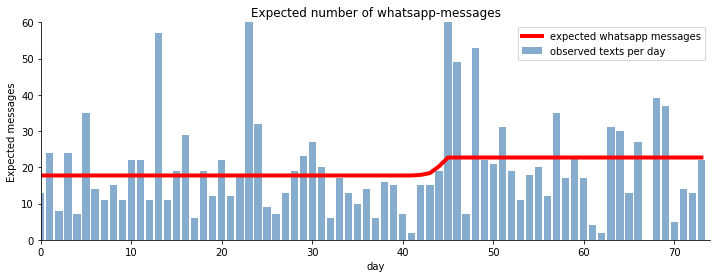

In [407]:
for d in range(0, n_count_data):
    ix = d < tau_samples
    expected_whatsapp_message_per_day[d] = (lambda_1_samples[ix].sum() + 
                                             lambda_2_samples[~ix].sum()) / N
    
fig, ax = plt.subplots(figsize=[12,4])
ax.plot(range(n_count_data), expected_whatsapp_message_per_day, lw=4, color='red',
         label='expected whatsapp messages')
ax.set(xlim = (0, n_count_data), ylim = (0, 60), 
       xlabel = 'day', ylabel = 'Expected messages', 
       title = 'Expected number of whatsapp-messages')
ax.bar(np.arange(len(count_data)), count_data, color='steelblue', alpha=0.65,
        label='observed texts per day')
ax.legend(loc='best')
remove_borders(ax)

### simulation of different results

What is cool is that we create new datasets by retelling the story. For example, if we reverse the above steps, we can simulate a new outcome. The steps:

- 1)  Specify when the user's behaviour switches by sampling from $\text{DiscreteUniform}(0, 80)$:
- 2.1) set an alpha: best practise for $\alpha$ as to reflect our belief is to set the value so that the mean of $\lambda$, given $\alpha$, is equal to our observed mean.
- 2.1) Draw $\lambda_1$ and $\lambda_2$ from an $\text{Exp}(\alpha)$ distribution
- 3)  For days before $\tau$, represent the user's received Whatsapp count by sampling from $\text{Poi}(\lambda_1)$, and sample from  $\text{Poi}(\lambda_2)$ for days after $\tau$. 

In [461]:
def simulation_whatsapp_messages():
    # step 1
    tau = stats.randint.rvs(0,80)
    #step 2.1
    alpha = 1/count_data.mean()
    #step 2.2
    lambda_1, lambda_2 = stats.expon.rvs(scale = 1/alpha, size=2)
    # step 3
    data = np.r_[stats.poisson.rvs(mu = lambda_1, size= tau),
                 stats.poisson.rvs(mu = lambda_2, size= 80 - tau)]
    # plot
    fig, ax = plt.subplots(figsize=[12,4])
    ax.bar(np.arange(80), data, color='steelblue')
    ax.bar(tau - 1, data[tau-1], color='red', label = 'behavior changed')
    ax.set(xlim = (-1,80))
    remove_borders(ax)
    
    return ax  

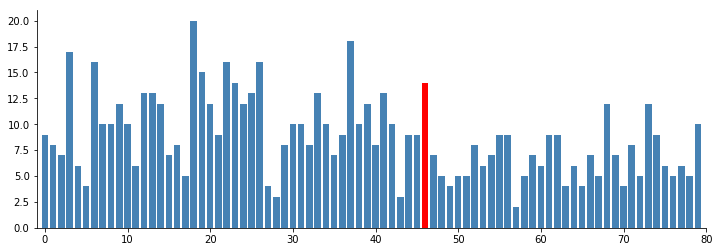

In [467]:
simulation_whatsapp_messages()

### Case 2 : A/B testing of 1 site

Assume that there is some true $0 \lt p_A \lt 1$ probability that users that are shown website A, convert. This true effectiveness of site A is unknown to us. Suppose A was shown to $N$ people, and $n$ people purchased from the site. One might conclude hastily that $p_A = \frac{n}{N}$. Unfortunately, the observed frequency $\frac{n}{N}$ does not necessarily equal $p_A$ -- there is a difference between the observed frequency and the true frequency of an event.

**With respect to our A/B example, we are interested in using what we know, $N$ (the total trials administered) and $n$ (the number of conversions), to estimate what $p_A$, the true frequency of buyers, might be**.

To setup a Bayesian model: 

- 1) we need to assign prior distributions to our unknown quantities. A priori, what do we think $p_A$ might be? For this example, we have no strong conviction about $p_A$, so for now, let's assume $p_A$ is uniform over [0,1]
- 2) as an example consider constants $p_A = 0.09$, and $N = 1500$ 
- 3) data generation: simulate from $N$ trials, by using a Bernoulli distribution: if  $X\ \sim \text{Ber}(p)$, then $X$ is 1 with probability $p$ and 0 with probability $1 - p$
- 4) combine the observations into PyMC3 observed variable, and run the inference algorithm.
- 5) plot the posterior distribution: observe how this posterior distribution puts most weight near the true value of $p_A$, but also some weights in the tails. This is a measure of how uncertain we should be, given our observations.!

In [42]:
# step 1
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1) # Continuous uniform log-likelihood.

# step 2
p_true = 0.05 # as an example
N = 1500

In [43]:
# step 3 --> here random variable has `p_true` chance of being 1.
occurrences = stats.bernoulli.rvs(p_true, size=N) 

# Occurrences.mean is equal to n/N.
print(np.sum(occurrences))
print('What is the observed frequency in Group A? :{:.4f}'.format(np.mean(occurrences)))
print('Does this equal the true frequency? :{}'.format((np.mean(occurrences) == p_true)))

77
What is the observed frequency in Group A? :0.0513
Does this equal the true frequency? :False


In [44]:
# step 4
with model:
    obs = pm.Bernoulli('obs', p, observed=occurrences)
    step = pm.Metropolis()
    trace = pm.sample(18000, step=step)
    burned_trace = trace[1000:]

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p]
Sampling 2 chains: 100%|██████████| 37000/37000 [00:07<00:00, 4832.34draws/s]
/home/diederik/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


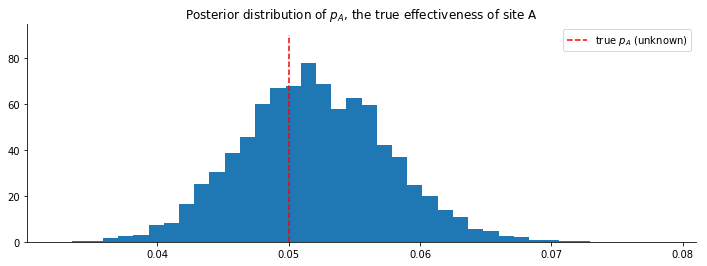

In [48]:
# step 5
fig, ax = plt.subplots(figsize=[12,4])

ax.vlines(p_true, 0, 90, linestyle="--", color='red', label="true $p_A$ (unknown)")
ax.hist(burned_trace["p"], bins=40, histtype="stepfilled", density=True)
ax.set(title = 'Posterior distribution of $p_A$, the true effectiveness of site A')     
_ = ax.legend(loc='best')
remove_borders(ax)

### A/B testing of 2 sites

We can do this similarly for another site B. But in case of AB tsting, we are really interested in the difference between $p_A$ and $p_B$. Let's infer $p_A$, $p_B$, and $\text{delta} = p_A - p_B$, all at once. We can do this using PyMC3's **deterministic variables**. (f.i. $p_B = 0.04$, so $\text{delta} = 0.01$, $N_B = 750$ (signifcantly less than $N_A$) and we will simulate site B's data like we did for site A's data )

recall --> deterministic variables are variables that are **not random** if the variables' parameters and components were known.

In [62]:
#these two quantities are unknown to us.
true_p_A = 0.05
true_p_B = 0.04

#unequal sample sizes --> no problem in Bayesian analysis!
N_A = 1500
N_B = 750

occ_A = stats.bernoulli.rvs(true_p_A, size=N_A)
occ_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print("Occurences from site A: ", occ_A[:25],'...')
print("Occurences from site B: ", occ_B[:25], '...')

Occurences from site A:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Occurences from site B:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...


In [63]:
with pm.Model() as model:
    p_A = pm.Uniform('p_A', lower=0, upper=1)
    p_B = pm.Uniform('p_B', lower=0, upper=1)
    
    # define a deterministic delta function
    delta = pm.Deterministic('delta', p_A - p_B)
    
    obs_A = pm.Bernoulli('obs_A', p_A, observed=occ_A)
    obs_B = pm.Bernoulli('obs_B', p_B, observed=occ_B)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace=trace[1000:]

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|██████████| 41000/41000 [00:12<00:00, 3335.17draws/s]
/home/diederik/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 25% for some parameters.


In [64]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

/home/diederik/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


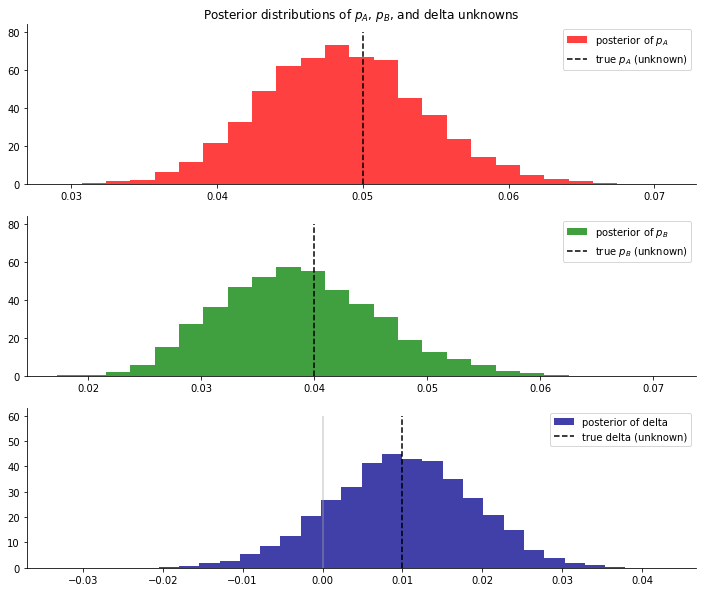

In [101]:
#histogram of posteriors
fig, ax = plt.subplots(3,1,figsize=[12,10])

ax[0].hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.75,
           label="posterior of $p_A$", color='red', normed=True)
ax[0].vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
ax[0].set(title = "Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax[1].hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.75,
           label="posterior of $p_B$", color='green', normed=True)
ax[1].vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")


ax[2].hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.75,
           label="posterior of delta", color='darkblue', normed=True)
ax[2].vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
ax[2].vlines(0, 0, 60, color='darkgrey', alpha=0.5)

for i, x in enumerate(ax.ravel()):
    ax[i].legend(loc='best')
    remove_borders(ax[i])

N_B < N_A so we have less data from site B and the posterior distribution of $p_B$ is flatter, implying we are less certain about the true value of $p_B$ than we are of $p_A$.

With respect to the posterior distribution of $\text{delta}$, we can see that the majority of the distribution is above $\text{delta}=0$, implying there site A's response is likely better than site B's response. The probability this inference is incorrect is easily computable:

In [105]:
# Count number of samples < 0, i.e. the area under the curve before 0, 
# representing the probability that site A is worse than site B.
print('Probability site A is WORSE than site B: {:.3f}'\
      .format(np.mean(delta_samples < 0)))
print('Probability site A is BETTER than site B: {:.3f}'\
      .format(np.mean(delta_samples > 0)))

Probability site A is WORSE than site B: 0.137
Probability site A is BETTER than site B: 0.863


### Case 3 : cheating amongst students

First intro to **binomial distribution**: has 2 parameters: $N$, a positive integer representing $N$ trials or number of instances of potential events, and $p$, the probability of an event occurring in a single trial. Like the Poisson distribution, it is a **discrete distribution**, but unlike the Poisson distribution, it only weighs integers from $0$ to $N$. The mass distribution looks like:

$$P( X = k ) =  {{N}\choose{k}}  p^k(1-p)^{N-k}$$
If $X$ is a binomial random variable with parameters $p$ and $N$, denoted $X \sim \text{Bin}(N,p)$, then $X$ is the number of events that occurred in the $N$ trials (obviously $0 \le X \le N$). The larger $p$ is (while still remaining between 0 and 1), the more events are likely to occur.

Case: let $N$ be the the total number of students who took an exam and assuming each student is interviewed post-exam (answering without consequence), we will receive integer $X$ "Yes I did cheat" answers. Absurd off course that's why the follwoing privacy mecanism can be applied: 

```In the interview process for each student, the student flips a coin, hidden from the interviewer. The student agrees to answer honestly if the coin comes up heads. Otherwise, if the coin comes up tails, the student (secretly) flips the coin again, and answers "Yes, I did cheat" if the coin flip lands heads, and "No, I did not cheat", if the coin flip lands tails. This way, the interviewer does not know if a "Yes" was the result of a guilty plea, or a Heads on a second coin toss. Thus privacy is preserved and the researchers receive honest answers.```

Question now: suppose 100 students are surveyed for cheating, and we wish to find $p$, the proportion of cheaters. How to model this?

In [126]:
N = 100
with pm.Model() as model:
    p = pm.Uniform("freq_cheating", 0, 1)
    
# data-generation model
with model:
    true_answers = pm.Bernoulli('truths', p, shape=N, 
                                testval = np.random.binomial(1, 0.5, N))

# next step that occurs is the first coin-flip each student makes. 
# This can be modeled again by sampling 100 Bernoulli random variables with $p=1/2$
with model:
    first_coin_flips = pm.Bernoulli('first_flips', 0.5, shape=N, 
                                   testval = np.random.binomial(1, 0.5, N))
    
# Although not everyone flips 2nd time, we can still model the possible 
# realization of 2nd coin-flips:
with model:
    second_coin_flips = pm.Bernoulli("second_flips", 0.5, shape=N, 
                                     testval=np.random.binomial(1, 0.5, N))
    
# Using these variables, we can return a possible realization of the 
# observed proportion of "Yes" responses by using a PyMC3 deterministic variable
with model:
    val = first_coin_flips*true_answers + (1 - first_coin_flips)*second_coin_flips
    observed_proportion = pm.Deterministic("observed_proportion", tt.sum(val)/float(N))

We need a dataset now. After performing the coin-flipped interviews, the researchers received 35 'Yes' responses. To put this into a relative perspective, if there truly were no cheaters, we should expect to see on average 1/4 of all responses being a "Yes" (half chance of having first coin land Tails, and another half chance of having second coin land Heads), so about 25 responses in a cheat-free world. On the other hand, if all students cheated, we should expected to see approximately 3/4 of all responses be "Yes".

The researchers observe a Binomial random variable, with N = 100 and p = observed_proportion with value = 35:

In [127]:
X = 35

with model:
    observations = pm.Binomial("obs", N, observed_proportion, observed=X)

In [128]:
# add variables to Model container and run algorithm (TAKES LONG TIME!!)
with model:
    step = pm.Metropolis(vars=[p])
    trace = pm.sample(40000, step=step)
    burned_trace = trace[15000:]

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [freq_cheating]
>BinaryGibbsMetropolis: [truths, first_flips, second_flips]
Sampling 2 chains: 100%|██████████| 81000/81000 [18:16<00:00, 73.85draws/s]
/home/diederik/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The number of effective samples is smaller than 10% for some parameters.


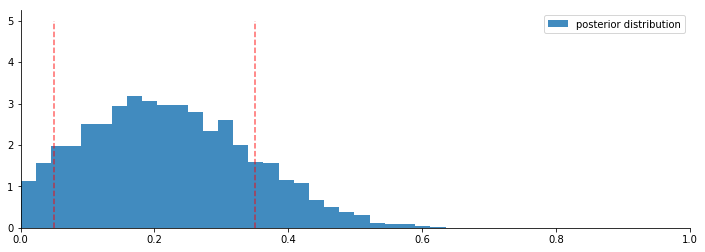

In [139]:
fig, ax = plt.subplots(figsize=[12,4])

p_trace = burned_trace["freq_cheating"][15000:]
ax.hist(p_trace, histtype="stepfilled", density=True, alpha=0.85, bins=30,
       label="posterior distribution")
ax.vlines([.05, .35], [0, 0], [5, 5], linestyle= '--', alpha=0.6, color='red')
ax.set(xlim = (0, 1))
_ = ax.legend(loc='best')
remove_borders(ax)

### Case 4 Space Shuttle Disaster 

"At temperature $t$, what is the probability of a damage incident?"

In [163]:
data.T

array([[66., 70., 69., 68., 67., 72., 73., 70., 57., 63., 70., 78., 67.,
        53., 67., 75., 70., 81., 76., 79., 75., 76., 58.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]])

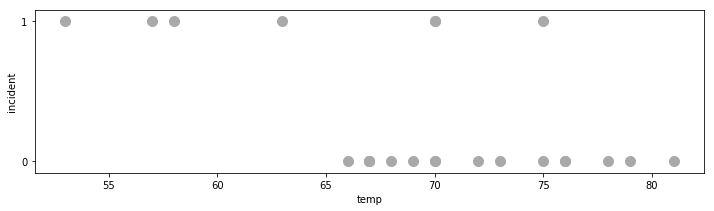

In [164]:
np.set_printoptions(precision=3, suppress=True)
data = np.genfromtxt(PATH + 'incidents.csv', skip_header=1, usecols=[1,2],
                    missing_values='NA', delimiter=',')
data = data[~np.isnan(data[:,1])]

fig, ax = plt.subplots(figsize=[12,3])
ax.scatter(data[:,0], data[:,1], s=100, color='darkgrey')
_ = ax.set(ylabel='incident', yticks=[0,1], xlabel='temp')

We need a function of temperature $p(t)$ bounded between 0 and 1 (to model probability) and changes from 1 to 0 as we increase temperature = **logistic function**

$$p(t) = \frac{1}{ 1 + e^{ \;\beta t } } $$

In [177]:
# function
def logistic(x, beta):
    return 1.0 / (1.0 + np.exp(beta * x))

# very close to the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

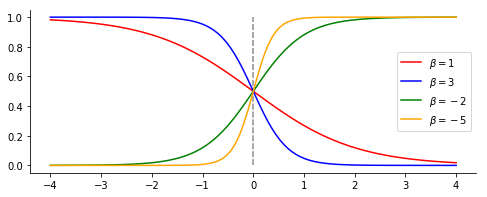

In [176]:
fig, ax = plt.subplots(figsize=[8,3])
x = np.linspace(-4, 4, 100)
for i, c in zip([1, 3, -2, -5], ['red', 'blue', 'green', 'orange']):
    ax.plot(x, logistic(x, i), label=r"$\beta = {}$".format(i), color=c)
    ax.vlines(x=0, ymin = 0, ymax=1, color='darkgrey', linestyle='--')
    ax.legend();
    remove_borders(ax)

the probability changes only near zero, but in our data above the probability changes around 65 to 70. We need to add a bias term to our logistic function:

$$p(t) = \frac{1}{ 1 + e^{ \;\beta t + \alpha } } $$

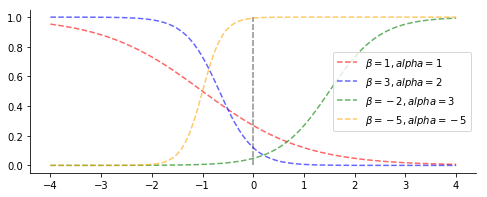

In [193]:
# Adding a constant term $\alpha$ shifts the curve left or right (hence a bias).
def logistic_plus_bias(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))


fig, ax = plt.subplots(figsize=[8,3])
for i, a, c in zip([1, 3, -2, -5], [1,2,3,-5],['red', 'blue', 'green', 'orange']):
    ax.plot(x, logistic_plus_bias(x, i, a), label=r"$\beta = {}, alpha = {}$"\
            .format(i, a), color=c, linestyle = '--', alpha=.6)
    ax.vlines(x=0, ymin = 0, ymax=1, color='darkgrey', linestyle='--')
    ax.legend();
    remove_borders(ax)

modeling

- The $\beta, \alpha$ parameters have no reason to be positive, bounded or relatively large, so they are best modeled by a **Normal random variable**.

In [198]:
temp = data[:,0]
defect = data[:,1]

with pm.Model() as model:
    beta = pm.Normal('beta', mu=0, tau=.001, testval=0) ## **
    alpha = pm.Normal("alpha", mu=0, tau=0.001, testval=0)
    p = pm.Deterministic("p", 1.0/(1. + tt.exp(beta*temp + alpha)))
    
# note: the smaller $\tau$, the larger the spread of the distribution 
# (i.e. we are more uncertain). Reciprocal to $\sigma^2$ 

We have our probabilities, but how do we connect them to our observed data? A Bernoulli random variable with parameter $p$, denoted $\text{Ber}(p)$, is a random variable that takes value 1 with probability $p$, and 0 else. Thus, our model can look like:

$$ \text{Defect Incident, $D_i$} \sim \text{Ber}( \;p(t_i)\; ), \;\; i=1..N$$

Note --> we set the values of beta and alpha to 0 `testval=0`. The reason for this is that if beta and alpha are very large, they make $p$ equal to 1 or 0. Unfortunately, **pm.Bernoulli** does not like probabilities of exactly 0 or 1, though they are mathematically well-defined probabilities. So by setting the coefficient values to 0, we set the variable p to be a reasonable starting value. This has no effect on our results, nor does it mean we are including any additional information in our prior. It is simply a computational caveat in PyMC3.

In [199]:
# connect the probabilities in `p` with our observations through a
# Bernoulli random variable.
with model:
    observed = pm.Bernoulli('obs', p, observed=defect)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(120000, step=step, start=start)
    burned_trace = trace[100000::2]

logp = -19.024, ||grad|| = 9.9071: 100%|██████████| 27/27 [00:00<00:00, 1343.96it/s]  
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]
Sampling 2 chains: 100%|██████████| 241000/241000 [01:05<00:00, 3683.32draws/s]
/home/diederik/anaconda3/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The estimated number of effective samples is smaller than 200 for some parameters.


We have trained our model on the observed data, now we can sample values from the posterior. Let's look at the posterior distributions for $\alpha$ and $\beta$:

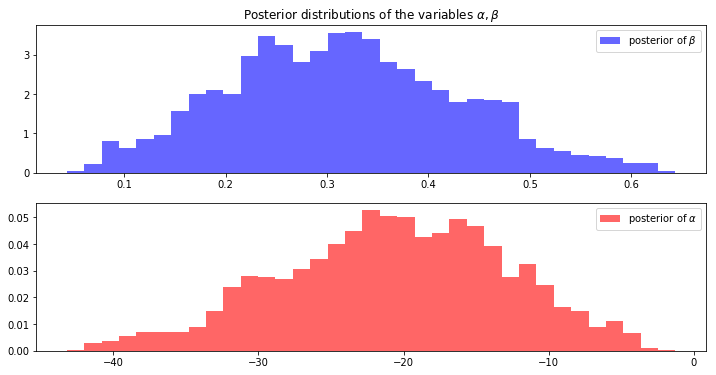

In [205]:
alpha_samples = burned_trace["alpha"][:, np.newaxis]  # best to make them 1d
beta_samples = burned_trace["beta"][:, np.newaxis]


#histogram of the samples:
fig, ax = plt.subplots(2,1, figsize=figsize)
ax[0].hist(beta_samples, histtype='stepfilled', bins=35, alpha=0.60,
          label=r"posterior of $\beta$", color='blue', density=True)
ax[0].set(title = r"Posterior distributions of the variables $\alpha, \beta$")
ax[0].legend(loc='best')

ax[1].hist(alpha_samples, histtype='stepfilled', bins=35, alpha=0.60,
          label=r"posterior of $\alpha$", color='red', density=True)
ax[1].legend(loc='best');

**some conclusions**
Samples of $\beta$ are > 0. If posterior was centered around 0, we may suspect that $\beta = 0$, implying that temperature has no effect on the probability of defect.

Similarly, all $\alpha$ posterior values are negative and far away from 0, implying that it is correct to believe that $\alpha$ is significantly less than 0.

Spread of the data, we are very uncertain about what the true parameters might be. (because of low sample size and the large overlap of defects-to-nondefects)

In [222]:
# Next, let's look at the expected probability for a specific value of the temperature. 
# = average over all samples from the posterior to get a likely value for $p(t_i)$.
t = np.linspace(temp.min()-5, temp.max() +5, 50)[:, np.newaxis]
p_t = logistic_plus_bias(t.T, beta_samples, alpha_samples)

mean_prob_t = p_t.mean(axis=0)
print ('mean_prob_t: {}'.format(mean_prob_t))

mean_prob_t: [0.973 0.97  0.966 0.962 0.958 0.952 0.946 0.939 0.931 0.921 0.91  0.896
 0.881 0.863 0.842 0.818 0.789 0.757 0.72  0.678 0.632 0.582 0.528 0.473
 0.417 0.363 0.313 0.266 0.225 0.189 0.158 0.132 0.11  0.092 0.078 0.065
 0.055 0.047 0.04  0.034 0.029 0.025 0.022 0.019 0.016 0.014 0.013 0.011
 0.01  0.009]


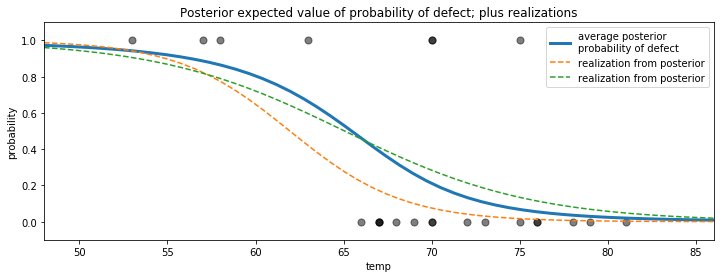

In [227]:
fig, ax = plt.subplots(figsize=[12,4])
ax.plot(t, mean_prob_t, lw=3, label="average posterior \nprobability \
of defect")
ax.plot(t, p_t[0, :], ls="--", label="realization from posterior")
ax.plot(t, p_t[-2, :], ls="--", label="realization from posterior")
ax.scatter(temp, defect, color="k", s=50, alpha=0.5)
ax.set(title = "Posterior expected value of probability of defect; \
plus realizations", ylim = (-0.1, 1.1), xlim = (t.min(), t.max()),
      ylabel = "probability", xlabel = "temp")
ax.legend(loc='best')

we also plotted two possible realizations of what the actual underlying system might be. Both are equally likely as any other draw. The blue line is what occurs when we average all the 20000 possible dotted lines together.

Another Question: what temperatures are we most uncertain about the defect-probability?

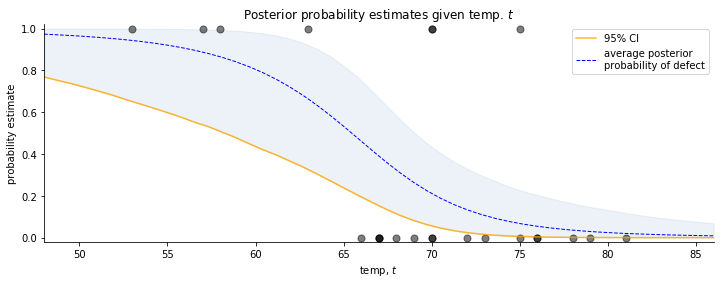

In [236]:
from scipy.stats.mstats import mquantiles
# vectorized bottom and top 2.5% quantiles for "confidence interval"
qs = mquantiles(p_t, [0.025, 0.975], axis=0)

fig, ax = plt.subplots(figsize=[12,4])
ax.fill_between(t[:, 0], *qs, alpha=0.1, color='steelblue')
ax.plot(t[:, 0], qs[0], label="95% CI", color='orange', alpha=0.8)
ax.plot(t, mean_prob_t, lw=1, ls="--", color='blue',
        label="average posterior \nprobability of defect")
ax.scatter(temp, defect, color="k", s=50, alpha=0.5)

_ = ax.set(xlim = (t.min(), t.max()), ylim = (-0.02, 1.02), 
       xlabel = "temp, $t$", ylabel = "probability estimate", 
       title = "Posterior probability estimates given temp. $t$")
ax.legend(loc='best')
remove_borders(ax)